### Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from functools import reduce

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import imblearn.over_sampling
from sklearn.metrics import confusion_matrix

/Users/courtney/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/courtney/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [5]:
df = pickle.load(open("clean_data.p", 'rb'))

# Binary outcome - positive or negative, Dogs and Cats

### Create train and test data 

In [597]:
model_df = df.dropna()

X1 = model_df.drop(['happy_outcome', 'outcome_class'], axis=1)
y1 = model_df.happy_outcome
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30)

In [598]:
model_df.dog.value_counts()

1    42106
0    26925
Name: dog, dtype: int64

In [599]:
y_train.value_counts()

1    31451
0    16870
Name: happy_outcome, dtype: int64

### Basic logistic regression 

In [637]:
model_df = df.dropna()

X1 = model_df.drop(['happy_outcome', 'outcome_class'], axis=1)
y1 = model_df.happy_outcome
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30)


lm_log_simple = LogisticRegression()
lm_log_simple.fit(X_train, y_train)
y_pred_log = lm_log_simple.predict(X_test)

print('\nLogistic Regression Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred_log))
print('Precision:', precision_score(y_test, y_pred_log))
print('F1:', f1_score(y_test, y_pred_log))
print('Recall:', recall_score(y_test, y_pred_log))


Logistic Regression Error Metrics

Accuracy: 0.674022211492
Precision: 0.687231638418
F1: 0.782779368706
Recall: 0.90918603782


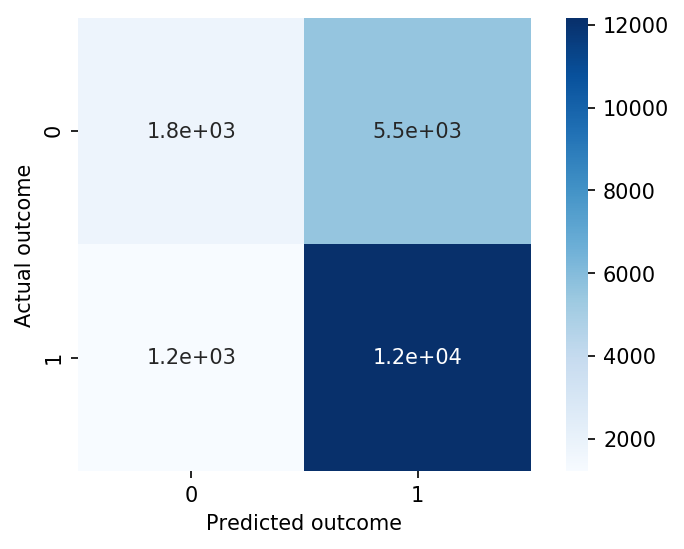

In [676]:
log_confusion = confusion_matrix(y_test, lm_log_simple.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(log_confusion, cmap=plt.cm.Blues, annot=True, square=True)

plt.xlabel('Predicted outcome')
plt.ylabel('Actual outcome')
plt.savefig('log_confusion_mat.png');

In [609]:
param_grid = {'C': np.linspace(1e-7,1e2,11)}
grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid.fit(X1,y1)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-07,   1.00000e+01,   2.00000e+01,   3.00000e+01,
         4.00000e+01,   5.00000e+01,   6.00000e+01,   7.00000e+01,
         8.00000e+01,   9.00000e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [610]:
import  warnings
warnings.filterwarnings('ignore')

pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.051918,0.174960,0.063918,0.018936,1e-07,{'C': 1e-07},0.648512,0.648486,0.648486,0.648486,...,0.648491,0.000010,11,0.648486,0.648493,0.648493,0.648493,0.648493,0.648491,0.000003
1,1.460303,0.082264,0.051430,0.019037,10,{'C': 10.00000009},0.674585,0.662755,0.650369,0.645734,...,0.657705,0.010144,10,0.671900,0.673554,0.680525,0.664572,0.668809,0.671872,0.005299
2,1.418458,0.108820,0.037953,0.012361,20,{'C': 20.00000008},0.674585,0.662755,0.650369,0.645806,...,0.657719,0.010127,2,0.671900,0.673554,0.680543,0.664572,0.668791,0.671872,0.005307
3,1.298280,0.077648,0.026489,0.004229,30,{'C': 30.00000007},0.674585,0.662755,0.650369,0.645806,...,0.657719,0.010127,2,0.671900,0.673554,0.680543,0.664572,0.668809,0.671876,0.005304
4,1.126079,0.047572,0.029190,0.008225,40,{'C': 40.00000006},0.674585,0.662755,0.650369,0.645806,...,0.657719,0.010127,2,0.671900,0.673554,0.680543,0.664572,0.668809,0.671876,0.005304
5,1.327816,0.093684,0.039178,0.012279,50,{'C': 50.00000005},0.674585,0.663697,0.650369,0.645806,...,0.657907,0.010227,1,0.671900,0.675201,0.680543,0.664572,0.668809,0.672205,0.005448
6,1.402922,0.081323,0.028735,0.006995,60,{'C': 60.00000004},0.674585,0.662755,0.650369,0.645806,...,0.657719,0.010127,2,0.671900,0.673554,0.680543,0.664572,0.668809,0.671876,0.005304
7,1.364559,0.048371,0.039666,0.020023,70,{'C': 70.00000003},0.674585,0.662755,0.650369,0.645806,...,0.657719,0.010127,2,0.671900,0.673554,0.680543,0.664572,0.668809,0.671876,0.005304
8,1.343344,0.074546,0.032419,0.009716,80,{'C': 80.00000002},0.674585,0.662755,0.650369,0.645806,...,0.657719,0.010127,2,0.671900,0.673554,0.680543,0.664572,0.668809,0.671876,0.005304
9,1.386389,0.074211,0.040080,0.007708,90,{'C': 90.00000001},0.674585,0.662755,0.650369,0.645806,...,0.657719,0.010127,2,0.671900,0.673554,0.680543,0.664572,0.668809,0.671876,0.005304


In [611]:
grid.best_estimator_

LogisticRegression(C=50.000000050000004, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [612]:
model_df = df.dropna()

X1 = model_df.drop(['happy_outcome', 'outcome_class'], axis=1)
y1 = model_df.happy_outcome
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30)


lm_log_simple = LogisticRegression(C=50.000000050000004, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
lm_log_simple.fit(X_train, y_train)
y_pred_log = lm_log_simple.predict(X_test)

print('\nLogistic Regression Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred_log))
print('Precision:', precision_score(y_test, y_pred_log))
print('F1:', f1_score(y_test, y_pred_log))
print('Recall:', recall_score(y_test, y_pred_log))


Logistic Regression Error Metrics

Accuracy: 0.663592467407
Precision: 0.687898089172
F1: 0.770028057435
Recall: 0.874428367944


### Oversample from negative outcomes

In [585]:
ROS = imblearn.over_sampling.RandomOverSampler(ratio={0:16841*2,1:31480}, random_state=42)
X_train_rs, y_train_rs = ROS.fit_sample(X_train, y_train)

#### Logistic regression on train data, score on test data: no resampling

In [586]:
lm = LogisticRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('\nLogistic Regression Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))


Logistic Regression Error Metrics

Accuracy: 0.66301303718
Precision: 0.704753487785
F1: 0.761865765858
Recall: 0.829050943116


#### Logistic regression on train data, score on test data: oversampling negative outcome

In [587]:
lm = LogisticRegression()
lm.fit(X_train_rs, y_train_rs)
y_pred = lm.predict(X_test)

print('\nLogistic Regression Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))


Logistic Regression Error Metrics

Accuracy: 0.66257846451
Precision: 0.775378337018
F1: 0.723006183606
Recall: 0.677261250557


In [625]:
lm_svc = LinearSVC()
lm_svc.fit(X_train, y_train)
y_pred_svc = lm_svc.predict(X_test)

print('\nLinear SVM Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred_svc))
print('Precision:', precision_score(y_test, y_pred_svc))
print('F1:', f1_score(y_test, y_pred_svc))
print('Recall:', recall_score(y_test, y_pred_svc))


Linear SVM Error Metrics

Accuracy: 0.3559150169
Precision: 0.0
F1: 0.0
Recall: 0.0


AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [589]:
lm = LinearSVC()
lm.fit(X_train_rs, y_train_rs)
y_pred = lm.predict(X_test)

print('\nLinear SVM Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))


Linear SVM Error Metrics

Accuracy: 0.426074360212
Precision: 0.749683944374
F1: 0.285267588695
Recall: 0.176147334026


#### KNN 

In [644]:
lm_knn = KNeighborsClassifier(n_neighbors=2)
lm_knn.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('\nKNN Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))

fpr_knn, tpr_knn, thresholds = roc_curve(y_test, lm_knn.predict_proba(X_test)[:,1])


KNN Error Metrics

Accuracy: 0.612602607436
Precision: 0.701869440675
F1: 0.698892850441
Recall: 0.695941400703


#### Random Forest 

In [639]:
lm_rf = RandomForestClassifier()
lm_rf.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('\nRandom Forest Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))

fpr_rf, tpr_rf, thresholds = roc_curve(y_test, lm_rf.predict_proba(X_test)[:,1])


Random Forest Error Metrics

Accuracy: 0.654128440367
Precision: 0.718105263158
F1: 0.740743421767
Recall: 0.764855370357


#### Decision Tree 

In [641]:
lm_dt = DecisionTreeClassifier()
lm_dt.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('\nDecision Tree Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))

fpr_dt, tpr_dt, thresholds = roc_curve(y_test, lm_dt.predict_proba(X_test)[:,1])


Decision Tree Error Metrics

Accuracy: 0.612602607436
Precision: 0.701869440675
F1: 0.698892850441
Recall: 0.695941400703


#### Gaussian 

In [642]:
lm_g = GaussianNB()
lm_g.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('\nGaussian Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))

fpr_g, tpr_g, thresholds = roc_curve(y_test, lm_g.predict_proba(X_test)[:,1])


Gaussian Error Metrics

Accuracy: 0.612602607436
Precision: 0.701869440675
F1: 0.698892850441
Recall: 0.695941400703


#### Dummy Classifier 

In [627]:
clf = DummyClassifier(strategy='most_frequent',random_state=4444) # what does random state do in DummyClassifier?
clf.fit(X_train, y_train)
y_pred_dummy = clf.predict(X_test)

print('\nDummy Classifier Test Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred_dummy))
print('Precision:', precision_score(y_test, y_pred_dummy))
print('F1:', f1_score(y_test, y_pred_dummy))
print('Recall:', recall_score(y_test, y_pred_dummy))

fpr_clf, tpr_clf, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])


Dummy Classifier Test Error Metrics

Accuracy: 0.6440849831
Precision: 0.6440849831
F1: 0.783517871303
Recall: 1.0


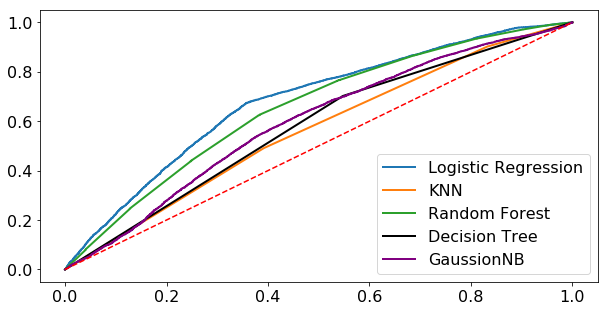

In [666]:
fpr, tpr, thresholds = roc_curve(y_test, lm_log_simple.predict_proba(X_test)[:,1])

plt.rc('legend',**{'fontsize':16})
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr,lw=2)
plt.plot(fpr_knn, tpr_knn,lw=2)
plt.plot(fpr_rf, tpr_rf,lw=2)
plt.plot(fpr_dt, tpr_dt,lw=2, c='black')
plt.plot(fpr_g, tpr_g,lw=2, c='purple')
plt.plot([0,1],[0,1],c='r',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xticks(size=16)
plt.yticks(size=16)
#plt.xlabel('False positive rate', size=16)
#plt.ylabel('True positive rate', size=16)
plt.legend(['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'GaussionNB'])
plt.savefig('ROC_curve.png');

# Multiple Class Outcomes, Dogs and Cats

### Create train and test data 

In [522]:
model_df = df.dropna()

X1 = model_df.drop(['happy_outcome', 'outcome_class'], axis=1)
y1 = model_df.outcome_class
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30)

In [523]:
lm = LinearSVC()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('\nLinear SVM Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Linear SVM Error Metrics

Accuracy: 0.431965234186
             precision    recall  f1-score   support

          0       0.39      0.61      0.48      4135
          1       0.46      0.58      0.51      6431
          2       0.55      0.27      0.37      9298
          3       0.09      0.16      0.12       846

avg / total       0.47      0.43      0.42     20710



In [524]:
lm = RandomForestClassifier()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('\nRandom Forest Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Error Metrics

Accuracy: 0.454949299855
             precision    recall  f1-score   support

          0       0.40      0.39      0.39      4135
          1       0.42      0.43      0.43      6431
          2       0.50      0.54      0.52      9298
          3       0.23      0.05      0.09       846

avg / total       0.45      0.45      0.45     20710



In [525]:
clf = DummyClassifier(strategy='most_frequent',random_state=4444) # what does random state do in DummyClassifier?
clf.fit(X_train, y_train)
y_pred_dummy = clf.predict(X_test)

print('\nDummy Classifier Test Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred_dummy))
print(classification_report(y_test, y_pred))


Dummy Classifier Test Error Metrics

Accuracy: 0.448961854177
             precision    recall  f1-score   support

          0       0.40      0.39      0.39      4135
          1       0.42      0.43      0.43      6431
          2       0.50      0.54      0.52      9298
          3       0.23      0.05      0.09       846

avg / total       0.45      0.45      0.45     20710



In [526]:
lm = LogisticRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('\nLogistic Regression Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Error Metrics

Accuracy: 0.49570255915
             precision    recall  f1-score   support

          0       0.45      0.54      0.49      4135
          1       0.47      0.29      0.36      6431
          2       0.52      0.66      0.59      9298
          3       0.00      0.00      0.00       846

avg / total       0.47      0.50      0.47     20710



## Dogs Only: binary outcome

In [601]:
dog_mask = (df.dog == 1)
dog_df = df[dog_mask]
model_df = dog_df.dropna()

X1 = model_df.drop(['happy_outcome', 'outcome_class', 'dog'], axis=1)
y1 = model_df.happy_outcome
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30)

In [602]:
y1.value_counts()

1    31662
0    10444
Name: happy_outcome, dtype: int64

In [603]:
clf = DummyClassifier(strategy='most_frequent',random_state=4444) # what does random state do in DummyClassifier?
clf.fit(X_train, y_train)
y_pred_dummy = clf.predict(X_test)

print('\nDummy Classifier Test Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred_dummy))
print('Precision:', precision_score(y_test, y_pred_dummy))
print('F1:', f1_score(y_test, y_pred_dummy))
print('Recall:', recall_score(y_test, y_pred_dummy))


Dummy Classifier Test Error Metrics

Accuracy: 0.755778974034
Precision: 0.755778974034
F1: 0.860904459173
Recall: 1.0


In [604]:
lm = LogisticRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('\nLogistic Regression Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))


Logistic Regression Error Metrics

Accuracy: 0.757758074731
Precision: 0.773643803257
F1: 0.857009345794
Recall: 0.960511155337


In [605]:
lm = RandomForestClassifier()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('\nRandom Forest Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))


Random Forest Error Metrics

Accuracy: 0.717780240659
Precision: 0.776177285319
F1: 0.825047848064
Recall: 0.88048601655


In [564]:
param_grid = {'C': np.linspace(1e-7,1e2,11)}
grid = GridSearchCV(LinearSVC(), param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid.fit(X1,y1)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-07,   1.00000e+01,   2.00000e+01,   3.00000e+01,
         4.00000e+01,   5.00000e+01,   6.00000e+01,   7.00000e+01,
         8.00000e+01,   9.00000e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [565]:
import  warnings
warnings.filterwarnings('ignore')

pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.645024,0.069761,0.025028,0.007847,1e-07,{'C': 1e-07},0.751959,0.751959,0.75193,0.75193,...,0.751959,0.000033,1,0.751959,0.751959,0.751967,0.751967,0.751944,0.751959,0.000008
1,13.770862,0.627343,0.016590,0.003733,10,{'C': 10.00000009},0.751959,0.751959,0.24807,0.75193,...,0.651190,0.201557,3,0.751959,0.751959,0.248033,0.751967,0.751944,0.651173,0.201570
2,12.449829,0.106240,0.017295,0.004773,20,{'C': 20.00000008},0.751959,0.248041,0.75193,0.75193,...,0.550373,0.246873,11,0.751959,0.248041,0.751967,0.751967,0.248056,0.550398,0.246868
3,11.852601,0.582056,0.011942,0.000565,30,{'C': 30.00000007},0.751959,0.751959,0.75193,0.24807,...,0.651190,0.201557,3,0.751959,0.751959,0.751967,0.248033,0.751944,0.651173,0.201570
4,11.470821,0.110206,0.012635,0.000637,40,{'C': 40.00000006},0.751959,0.751959,0.75193,0.75193,...,0.751959,0.000033,1,0.751959,0.751959,0.751967,0.751967,0.751944,0.751959,0.000008
5,13.440687,0.132437,0.019951,0.005128,50,{'C': 50.00000005},0.248041,0.751959,0.24807,0.75193,...,0.550397,0.246868,8,0.248041,0.751959,0.248033,0.751967,0.751944,0.550389,0.246869
6,13.572162,0.275374,0.015134,0.002165,60,{'C': 60.00000004},0.751959,0.248041,0.24807,0.75193,...,0.550397,0.246868,8,0.751959,0.248041,0.248033,0.751967,0.751944,0.550389,0.246869
7,14.200883,0.191224,0.014757,0.002393,70,{'C': 70.00000003},0.751959,0.248041,0.75193,0.24807,...,0.550397,0.246868,8,0.751959,0.248041,0.751967,0.248033,0.751944,0.550389,0.246869
8,20.699803,3.197633,0.027194,0.008636,80,{'C': 80.00000002},0.751959,0.751959,0.75193,0.24807,...,0.651190,0.201557,3,0.751959,0.751959,0.751967,0.248033,0.751944,0.651173,0.201570
9,13.441290,0.566561,0.017542,0.004896,90,{'C': 90.00000001},0.751959,0.751959,0.75193,0.24807,...,0.651190,0.201557,3,0.751959,0.751959,0.751967,0.248033,0.751944,0.651173,0.201570


In [566]:
grid.best_estimator_

LinearSVC(C=9.9999999999999995e-08, class_weight=None, dual=True,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)

In [567]:
lm = LinearSVC(C=9.9999999999999995e-08, class_weight=None, dual=True,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('\nLinear SVM Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))


Linear SVM Error Metrics

Accuracy: 0.755858138062
Precision: 0.755858138062
F1: 0.86095581605
Recall: 1.0


### Dogs only - multiple classifiers 

In [542]:
dog_mask = (df.dog == 1)
dog_df = df[dog_mask]
model_df = dog_df.dropna()

X1 = model_df.drop(['happy_outcome', 'outcome_class'], axis=1)
y1 = model_df.outcome_class
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30)

In [543]:
lm = LinearSVC()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('\nLinear SVM Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Linear SVM Error Metrics

Accuracy: 0.215167827739
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      3700
          1       0.22      1.00      0.35      2718
          2       0.00      0.00      0.00      5805
          3       0.00      0.00      0.00       409

avg / total       0.05      0.22      0.08     12632



/Users/courtney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [539]:
lm = RandomForestClassifier()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('\nRandom Forest Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Error Metrics

Accuracy: 0.430414819506
             precision    recall  f1-score   support

          0       0.39      0.42      0.40      3702
          1       0.28      0.19      0.23      2727
          2       0.50      0.58      0.54      5797
          3       0.11      0.02      0.04       406

avg / total       0.41      0.43      0.41     12632



In [502]:
clf = DummyClassifier(strategy='most_frequent',random_state=4444) # what does random state do in DummyClassifier?
clf.fit(X_train, y_train)
y_pred_dummy = clf.predict(X_test)

print('\nDummy Classifier Error Metrics\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Dummy Classifier Error Metrics

Accuracy: 0.437856238125
             precision    recall  f1-score   support

          0       0.40      0.45      0.42      3705
          1       0.30      0.21      0.24      2707
          2       0.51      0.56      0.53      5827
          3       0.16      0.03      0.05       393

avg / total       0.42      0.44      0.42     12632

